In [8]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline

import numpy as np
from tqdm import tqdm
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt

import seaborn as sns

import pickle

font = {'family' : 'serif',
    'serif': 'helvet',
    'weight' : 'bold',
    'size'   : 31}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Function to extract diagonal blocks of size M from a square matrix A
def extract_block_diag(A,M):

    blocks = np.array([A[i:i+M,i:i+M] 
                       for i in range(0,len(A),M)])
    return blocks

# Function to extract everything except for the diagonal blocks of size M from a square matrix A
def extract_block_non_diag(A,M,k=0):
    blocks = np.array([np.concatenate((A[:i,i:i+M], A[i+M:,i:i+M]))
                       for i in range(0,len(A),M)])
    return blocks

# Figure 4: Block-diagonal structure of the NTK

In [10]:
path = 'experiments/ntk_dynamics/' # Path to the folder with experiments (generated by ntk_train_dynamics.py script)

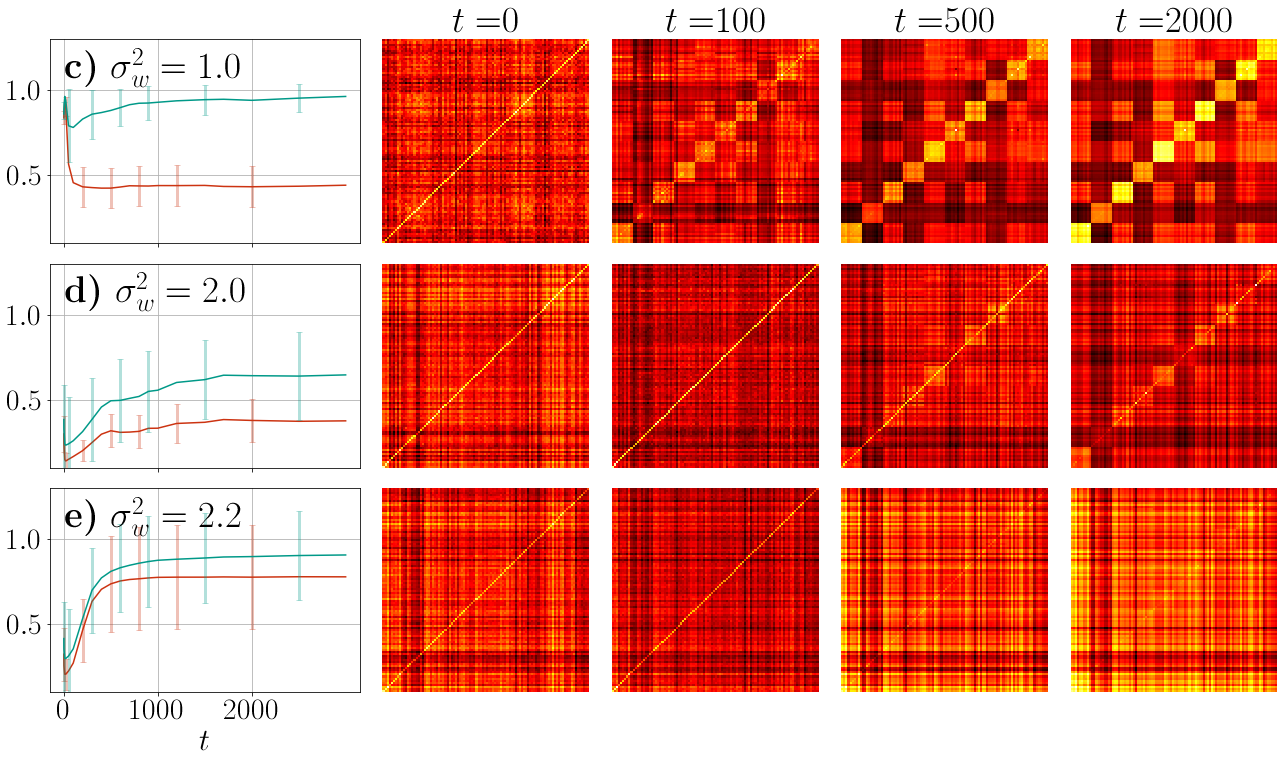

In [25]:
f,axs = plt.subplots(3,5,figsize=(22,12),gridspec_kw={'width_ratios':[1.5,1,1,1,1]})
    
cb_red = '#cc3311'
cb_green = '#009988'

M=300
L=20
var_w_s = [1.0,2.0,2.2] # values of sigma_w^2 to show

T = [0,1,10,20,50,100,200,300,400,500,600,700,800,900,1000,1200,1500,1700,2000,2500,3000] # epochs with computed NTK 
kernel_steps = [0,5,9,-3] # epochs to show in heatmaps (as indexes of T)

labels = ["$\sigma_w^2=1.0$ ","$\sigma_w^2=2.0$ ","$\sigma_w^2=2.2$"]

for ax, var_w, label in zip(axs,var_w_s,labels):

    
    K_path = path+"struct_w"+str(int(var_w*10))+"M"+str(M)+"L"+str(L)
    loss_path = path+"struct_loss_w"+str(int(var_w*10))+"M"+str(M)+"L"+str(L)
    test_loss_path = path+"struct_test_loss_w"+str(int(var_w*10))+"M"+str(M)+"L"+str(L)
    
    
    K = pickle.load(open(K_path, "rb" ) )
    loss_t = pickle.load(open(loss_path, "rb" ) )
    test_loss_t = pickle.load(open(test_loss_path, "rb" ) )
    diag = np.array([np.diag(K[t,:,:]) for t in range(K.shape[0])])

    for step,ax_ in zip(kernel_steps,ax[1:]):
        ax__ = sns.heatmap(K[step,:,:].T, ax=ax_, cmap='hot', cbar=False,
                         norm=matplotlib.colors.LogNorm(vmin=np.min(K[step,:,:]), 
                                                        vmax = np.max(K[step,:,:])),
                         cbar_kws={'ticks': matplotlib.ticker.LogLocator(base=10.0),
                                  'format': matplotlib.ticker.LogFormatterSciNotation(base=10.0),
                                   'extend': 'both'})

        ax__.invert_yaxis()
        ax__.set_xticks([])
        ax__.set_yticks([])
            

    ax[0].plot(T,[np.mean(extract_block_non_diag(K[t,:,:],10))/np.mean(diag[t,:]) 
              for t in range(K.shape[0])],color=cb_red)
    ax[0].errorbar(x = T,y = [np.mean(extract_block_non_diag(K[t,:,:],10,k=0))/np.mean(diag[t,:]) 
              for t in range(K.shape[0])],
             yerr=[np.std(extract_block_non_diag(K[t,:,:],10))/np.mean(diag[t,:]) 
              for t in range(K.shape[0])], fmt='None', color=cb_red,
                 ecolor=cb_red, elinewidth=3, capsize=3, errorevery=(3), alpha=0.3)
    ax[0].plot(T,[np.mean(extract_block_diag(K[t,:,:],10))/np.mean(diag[t,:])
              for t in range(K.shape[0])], color=cb_green)
    ax[0].errorbar(x = T, y = [np.mean(extract_block_diag(K[t,:,:],10))/np.mean(diag[t,:]) 
              for t in range(K.shape[0])],
             yerr=[np.mean([np.std(extract_block_diag(K[t,:,:],10)[i]) 
                            for i in range(10)])/np.mean(diag[t,:]) 
              for t in range(K.shape[0])], fmt='None', color=cb_green,
                 ecolor=cb_green, elinewidth=3, capsize=3, errorevery=(1,3), alpha=0.3)


    
axs[-1,0].set_xlabel("$t$")

for step,ax_ in zip(kernel_steps,axs[0][1:]):
        ax_.set_title(r'$t=$'+str(T[step]))
        
        
for ax in axs:
    ax[0].set_ylim([0.1,1.3])
    ax[0].set_yticks([0.5,1.0])
    ax[0].set_xticks([0,1000,2000])
    ax[0].set_xticklabels([])
    ax[0].grid()
    ax[0].tick_params(axis='both', which='major', labelsize=30)

axs[-1,0].set_xticks([0,1000,2000])
axs[-1,0].set_xticklabels([0,1000,2000])

for l,v,ax in zip([r'$\textbf{c)}$ ',r'$\textbf{d)}$ ',r'$\textbf{e)}$ '],labels,axs):
    ax[0].set_title(l+v, loc='left', y=0.78, x=0.05)

plt.subplots_adjust(wspace = 0.1,hspace=0.1)

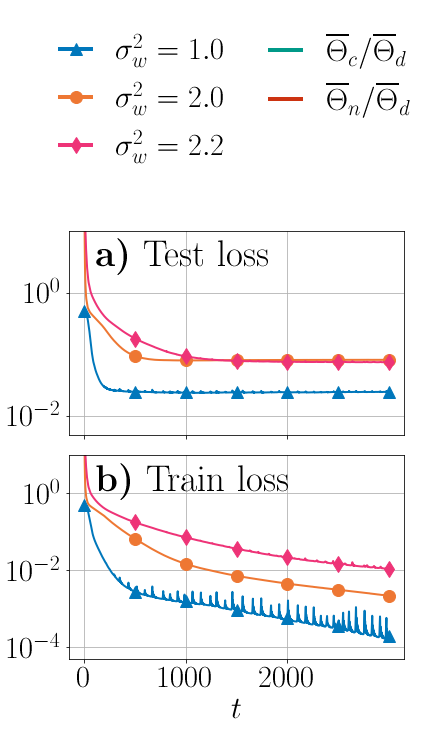

In [26]:
f,axs = plt.subplots(3,1,figsize=(6,12))
markers = ['^','o','d']

axs[0].axis('off')

colors = ['#0077bb','#ee7733', '#ee3377']
for var_w, label, m, color in zip(var_w_s,labels,markers,colors):

    loss_path = path+"struct_loss_w"+str(int(var_w*10))+"M"+str(M)+"L"+str(L)
    test_loss_path = path+"struct_test_loss_w"+str(int(var_w*10))+"M"+str(M)+"L"+str(L)
    
    loss_t = pickle.load(open(loss_path, "rb" ) )
    test_loss_t = pickle.load(open(test_loss_path, "rb" ) )
   
    axs[0].plot([],label=label,linewidth=2,marker=m,markevery=500,markersize=12,color=color)

    axs[1].plot(test_loss_t,linewidth=2,marker=m,markevery=500,markersize=12,color=color)
    axs[1].set_yscale('log')
    axs[1].set_ylim([0.5e-2,10])
    
    axs[2].plot(loss_t,label=label,linewidth=2,marker=m,markevery=500,markersize=12,color=color)
    axs[2].set_yscale('log')
    axs[2].set_ylim([5e-5,10])
    
axs[1].plot([],color=cb_green,linewidth=3,label = '$\overline{\Theta}_c/\overline{\Theta}_d$')
axs[1].plot([],color=cb_red,linewidth=3,label = '$\overline{\Theta}_n/\overline{\Theta}_d$')

axs[1].grid()
axs[2].grid()
axs[1].set_title(r"$\textbf{a)}$ Test loss",loc='left', y=0.8, x=0.08)
axs[2].set_title(r"$\textbf{b)}$ Train loss",loc='left', y=0.8, x=0.08)
axs[2].set_xlabel("$t$")

axs[1].set_yticks([1,1e-2])
axs[2].set_yticks([1,1e-2,1e-4])

axs[1].set_xticks([0,1000,2000])
axs[1].set_xticklabels([])
axs[2].set_xticks([0,1000,2000])

leg0 = axs[0].legend(bbox_to_anchor=(0.55, 1.),handlelength=1,framealpha=0,fontsize=31, ncol=1)
leg1 = axs[1].legend(bbox_to_anchor=(1.1, 2.1),handlelength=1,framealpha=0,fontsize=31, ncol=1)

for line in leg0.get_lines():
    line.set_linewidth(4.0)
for line in leg1.get_lines():
    line.set_linewidth(4.0)
    
plt.subplots_adjust(hspace = 0.1)